In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from mlflow.tracking import MlflowClient
from mlflow.entities import Metric

In [9]:
tracking_uri = "file:///pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/logoffline-trim10-ll10-win4320/logs/mlflow"
name = "937045354650512675"


In [10]:
client = MlflowClient(tracking_uri=tracking_uri)
runs = client.search_runs(experiment_ids=[name])

In [30]:
tloss = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "train_mse_loss_epoch")])
vloss = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "val_mse_loss_epoch")])
lr = np.array([x.value for x in client.get_metric_history(runs[0].info.run_id, "lr-AdamW")])
#vloss = client.get_metric_history(runs[0].info.run_id, "val_mse_loss_epoch")

In [28]:
plt.style.use("~/nice.mplstyle")

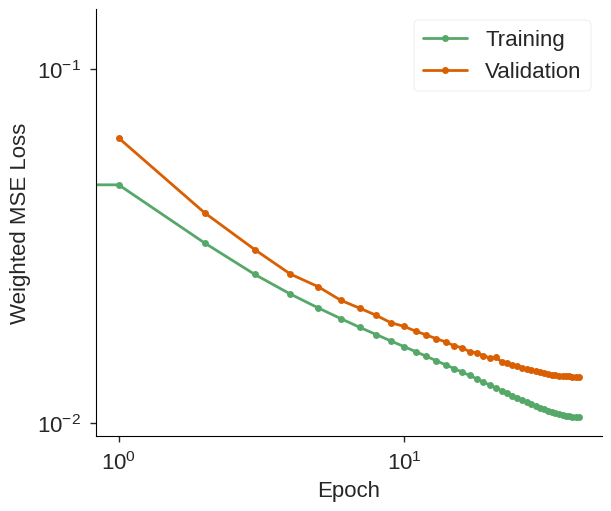

In [37]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

for x, y, label in zip(
    [np.arange(len(tloss)), np.arange(len(vloss))+1],
    [tloss, vloss],
    ["Training", "Validation"],
):
    ax.plot(
        x, y,
        marker="o",
        markersize=5,
        label=label,
    )
ax.set(
    yscale="log",
    xscale="log",
    xlabel="Epoch",
    ylabel="Weighted MSE Loss",
)
#ax.axvline(x=142, color="gray")
ax.legend();
fig.savefig(f"figures/current_loss.jpeg", bbox_inches="tight", dpi=300)

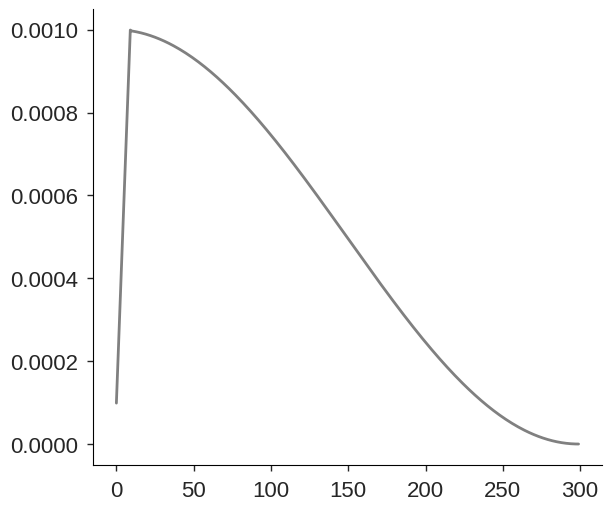

In [36]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)
ax.plot(np.arange(len(lr)), lr, color="gray")
fig.savefig("learning_rate.jpeg", dpi=300, bbox_inches="tight")

In [ ]:
kkk

In [20]:
np.argmin(vloss)

142

In [27]:
vloss[140:144]

array([0.01936564, 0.01942074, 0.01931109, 0.01940062])

In [28]:
vloss[-1]

0.020118797197937965

In [26]:
vloss[142]

0.0193110890686512

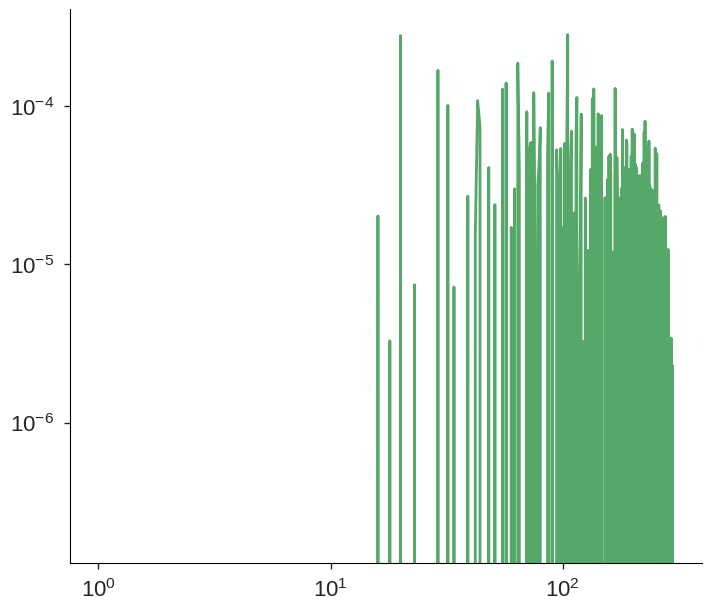

In [19]:
plt.loglog(np.diff(vloss))